In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
import aPack_utils
import geopandas as gpd
from shapely.geometry import Point
import rasterio
import utm

args = EasyDict()


#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/C1_20221227015155_09806_00006119_L1G_RGB.tif"

#------ Coordinates filtering function
args.txt_path = None

args.xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/C1_20221227015155_09806_00006119_L1G_Aux.xml"


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0130.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0130_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0130_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0130.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0222.csv")
args.csv_output_scatter = args.img_path.replace(".png","_scatter_v1_0222.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 30
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.meter_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = True


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G
time :  2022 12 27 10 51
202212271000_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개/202212271000_dynamic.csv
#------------------ : csv exists


In [203]:
from datetime import datetime

# Your input string
input_string =  str(args.year_) + str(args.month_) + str(args.day_) + str(args.hour_) +  str(args.min)

# Specify the format of the input string
input_format = "%Y%m%d%H%M"

# Convert the string to a datetime object
datetime_object = datetime.strptime(input_string, input_format)

# Now you have a datetime object, and you can work with it as needed
print(datetime_object)


2022-12-27 10:51:00


In [204]:
input_string

'202212271051'

In [205]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 9933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

In [206]:
img_.size

(7410, 7220)

In [207]:
!nvidia-smi

Thu Feb 22 16:27:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        On  | 00000000:3B:00.0 Off |                  N/A |
|  0%   27C    P8              23W / 350W |   2103MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Model Inference

In [208]:
import aPack_model

#0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS

if args.model_test:
    result = aPack_model.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    print("Result Loaded")
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

Result Loaded


# 2. AIS csv 

- time condition 에 맞게 filtering 

In [209]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [210]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"

date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2022-12-27 10:21:00
now :  2022-12-27 10:51:00
late :  2022-12-27 11:21:00


In [211]:
from aPack_utils import filtering_datetime

In [212]:
t_df = filtering_datetime(df, date, time_gap_min,time_gap_sec )

early :  2022-12-27 10:21:00
now :  2022-12-27 10:51:00
late :  2022-12-27 11:21:00
early :  2022-12-27 10:21:00
now :  2022-12-27 10:51:00
late :  2022-12-27 11:21:00


In [213]:
t_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
0,311049600,2022-12-27 10:00:00,129.320878,34.955367,305,0.0,15.5,2022-12-27 10:00:00
1,440414850,2022-12-27 10:00:00,129.050902,35.123505,141,0.0,0.0,2022-12-27 10:00:00
2,440116550,2022-12-27 10:00:00,129.069312,35.110957,511,-128.0,0.0,2022-12-27 10:00:00
3,440409790,2022-12-27 10:00:00,129.077403,35.103573,511,-128.0,0.1,2022-12-27 10:00:00
4,440132370,2022-12-27 10:00:00,129.061967,35.021985,248,0.0,0.5,2022-12-27 10:00:00
...,...,...,...,...,...,...,...,...
45336,440119000,2022-12-27 10:59:59,129.064067,35.126300,34,0.0,0.1,2022-12-27 10:59:59
45337,441439000,2022-12-27 10:59:59,129.047475,35.096155,182,-128.0,0.0,2022-12-27 10:59:59
45338,440132140,2022-12-27 10:59:59,129.006823,34.815038,36,-1.0,9.7,2022-12-27 10:59:59
45339,440100190,2022-12-27 10:59:59,129.090590,35.107432,232,-0.0,0.1,2022-12-27 10:59:59


# 3. Coordinates filtering


In [214]:
from aPack_utils import coordinates_filtering

points = coordinates_filtering(None, args.xml_path)
min_long,max_long,min_lat,max_lat = points[0],points[1],points[2],points[3]

<Element 'Image' at 0x7f4c041e6c20>
128.929319933 129.091715185 34.936818919 35.067044759


In [215]:
q_df = aPack_utils.location_filtering(t_df,min_long,max_long,min_lat,max_lat)

In [216]:
q_df = aPack_utils.latlon_to_pixels(q_df,args.tf_path)

/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/aPack_utils.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/aPack_utils.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/aPack_utils.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [217]:
q_df.to_csv(args.csv_output_scatter,index=False)

In [218]:
args.img_output

'/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G_output_v1_0130.png'

In [219]:
bbox_ais_gap = aPack_utils.meter_to_pixel(args.meter_gap, img_.size, min_long,max_long,min_lat,max_lat)
bbox_ais_gap

90.08437177664538

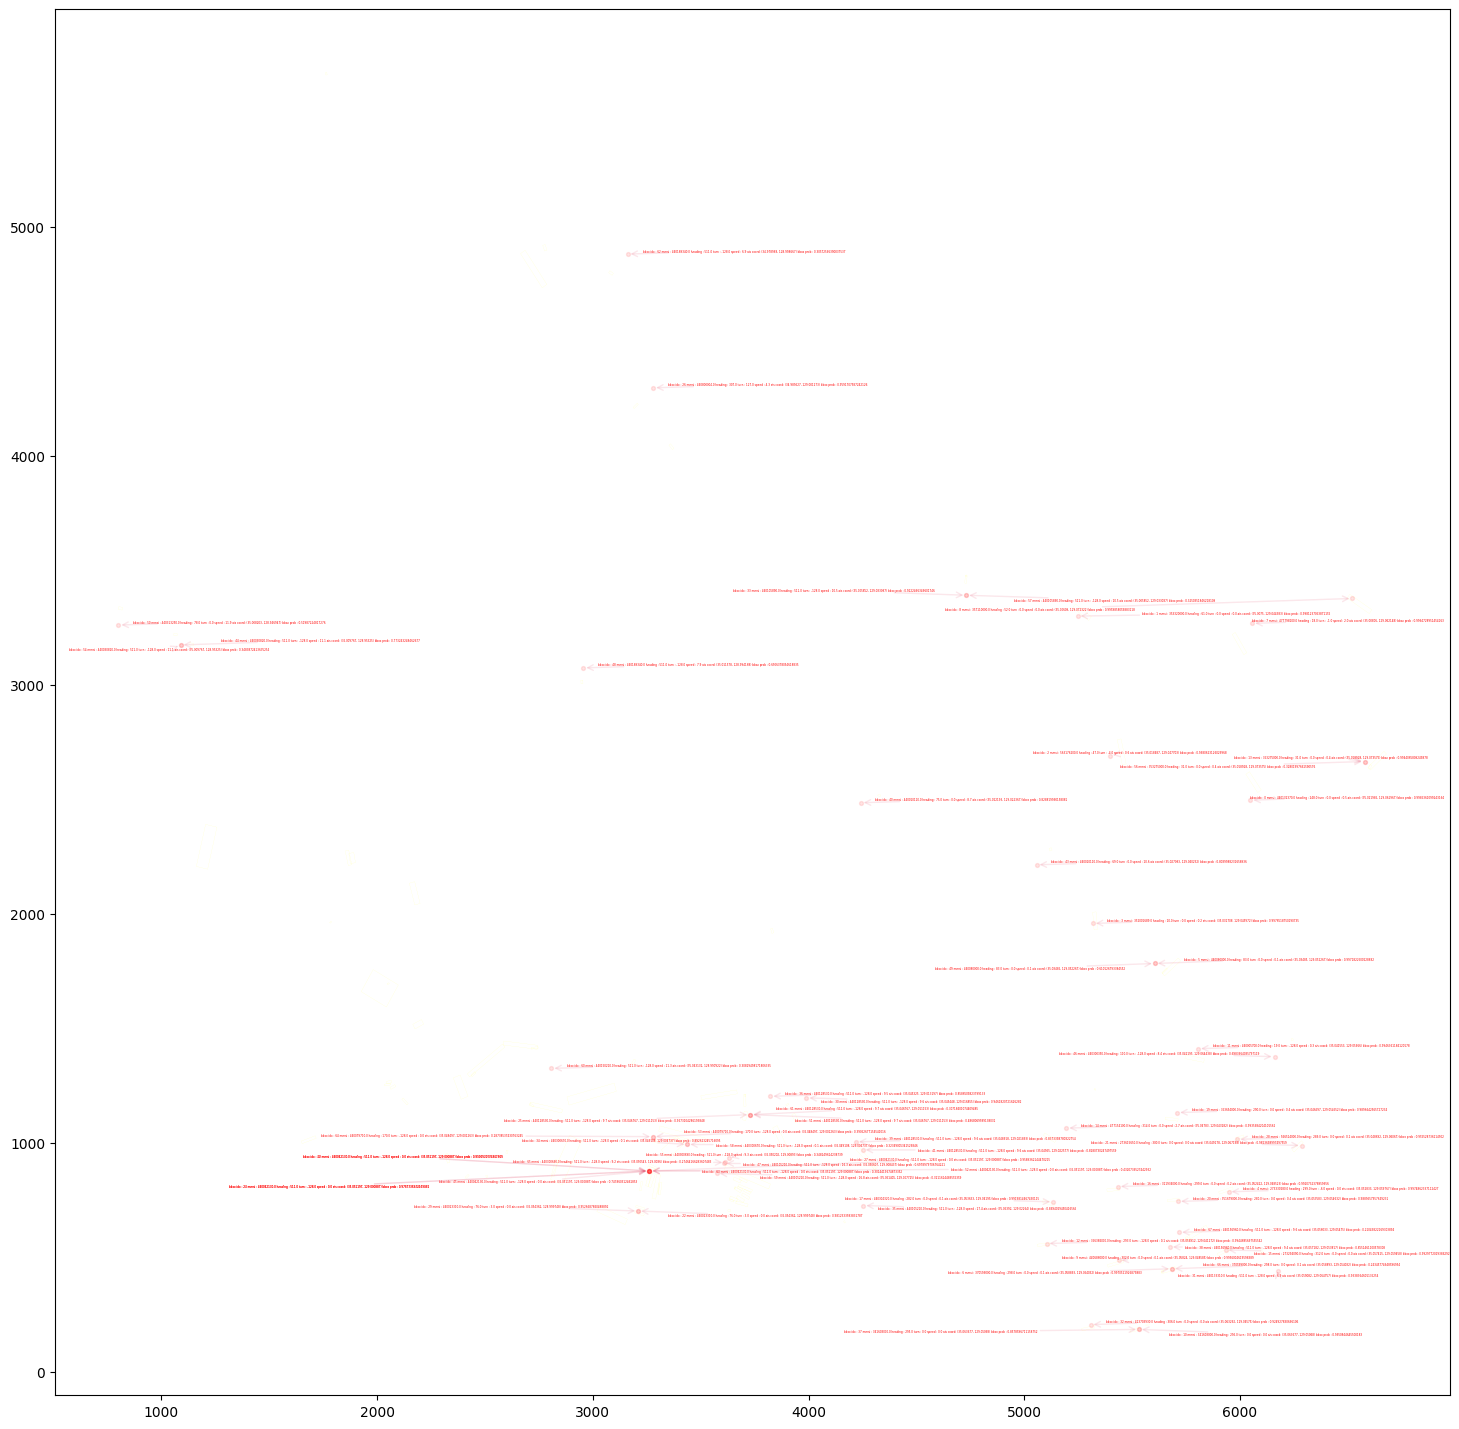

In [220]:
#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text



save_flag = False
M_ = aPack_utils.match_bbox_ais(args.img_path,
                           result,
                           args.infer_threshold_showing,
                           q_df,
                           bbox_ais_gap,
                           args.img_output,
                           800,
                           save_flag)

M_.to_csv(args.csv_output)

In [221]:
# # Scatter Only 
# # AIS 

# plt.figure(figsize=(18,18))
# plt.imshow(img_)
# plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

# #plt.savefig(args.img_output_scatter,dpi =800)
# plt.show()

# Masking BBox in the land 

In [222]:
args.map_path
os.path.exists(args.map_path)

True

In [223]:
M_masked = aPack_utils.masking_bbox_land(args.map_path, args.tf_path, M_ , args.csv_output_masked)
M_masked.to_csv(args.csv_output_masked)

progress :  0  /  114
progress :  1  /  114
progress :  2  /  114
progress :  3  /  114
progress :  4  /  114
progress :  5  /  114
progress :  6  /  114
progress :  7  /  114
progress :  8  /  114
progress :  9  /  114
progress :  10  /  114
progress :  11  /  114
progress :  12  /  114
progress :  13  /  114
progress :  14  /  114
progress :  15  /  114
progress :  16  /  114
progress :  17  /  114
progress :  18  /  114
progress :  19  /  114
progress :  20  /  114
progress :  21  /  114
progress :  22  /  114
progress :  23  /  114
progress :  24  /  114
progress :  25  /  114
progress :  26  /  114
progress :  27  /  114
progress :  28  /  114
progress :  29  /  114
progress :  30  /  114
progress :  31  /  114
progress :  32  /  114
progress :  33  /  114
progress :  34  /  114
progress :  35  /  114
progress :  36  /  114
progress :  37  /  114
progress :  38  /  114
progress :  39  /  114
progress :  40  /  114
progress :  41  /  114
progress :  42  /  114
progress :  43  /  11

/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/aPack_utils.py:472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_masked['box index'] = [i for i in range(len(M_masked))]


# Masked Visualization

In [224]:
# visualize the result with masking 
# original image 
img_path = args.img_path
#aPack_utils.visualize_mask(img_path, M_masked)

# Extract Chips

In [225]:
#----- load 
img_path = args.img_path
M_chip = pd.read_csv(args.csv_output_masked)

img_part = Image.open(img_path)
prefix_ = args.img_path.split("/")[-1].replace(".png","")

a= os.path.dirname(args.img_path)
chip_folder = os.path.join(a,"chips")

if os.path.exists(chip_folder):
    print("folder exists")
else:
    os.mkdir(chip_folder)
    print("folder created")

folder created


In [226]:
print(chip_folder)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/chips


In [227]:
M_chip

,Unnamed: 0,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time,box index
0,0,6062.7476,2576.97360,96.756910,20.105816,-0.966657,0.998536,440132370.0,248.0,0.0,0.5,6048,2498,35.021985,129.061967,2022-12-27 10:00:00,0
1,1,5267.9310,3319.12280,92.396010,20.180357,-0.648144,0.998124,353320000.0,61.0,0.0,0.0,5247,3302,35.007500,129.044383,2022-12-27 10:02:43,1
2,2,5451.5728,2709.14010,112.080536,18.148483,-1.359952,0.998062,563176200.0,47.0,-4.0,0.6,5398,2693,35.018487,129.047703,2022-12-27 10:04:45,2
3,3,5328.2370,1970.90970,77.750620,15.707102,-1.490668,0.997652,352001689.0,10.0,0.0,0.2,5318,1960,35.031708,129.045972,2022-12-27 10:00:26,3
4,4,5934.7305,793.56300,67.259130,11.462839,0.312443,0.997486,273330280.0,299.0,-6.0,0.0,5947,788,35.052833,129.059767,2022-12-27 10:00:17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,3672.3577,796.54820,33.122375,10.692307,-0.537411,0.337547,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,92
93,93,2051.0637,1696.90360,9.357801,4.799193,0.325931,0.323768,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,93
94,94,2716.4478,1167.51700,21.815239,6.586352,-0.571627,0.232901,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,94
95,95,3706.6768,803.42560,66.921930,10.985867,-0.364053,0.220793,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,95


In [228]:
prefix_

'0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G'

In [229]:
aPack_utils.extract_chips(M_chip, img_part,chip_folder,prefix_)

{0}
{1}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{21}
{22}
{23}
{24}
{25}
{26}
{27}
{28}
{29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{39}
{40}
{41}
{42}
{43}
{44}
{45}
{46}
{47}
{48}
{49}
{50}
{51}
{52}
{53}
{54}
{55}
{56}
{57}
{58}
{59}
{60}
{61}
{62}
{63}
{64}


In [230]:
import subprocess


folder_ = chip_folder
zip_command = ["zip", "-jr","chips_v1.zip", folder_]

try:    
    subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
    print("Zip operation successful.")
except subprocess.CalledProcessError as e:
    print(f"Error during zip operation: {e}")

  adding: 60_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 28_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 20_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 58_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 44_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 8_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 36_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 59_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 6_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 10_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 45_0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png (deflated 0%)
  adding: 54_0-Pusan-2023-AO_1_C1_20221227015155_09806_0